In [1]:
import os
import h5py

In [5]:
%matplotlib inline

In [8]:
h5_path =r'.\test_files\F45.h5'
f = h5py.File(h5_path, 'r')
print(len(f.keys()))

19


GT_A7_flim_Nrascells_D125440_S0_H160_Q113_Z933_G80.spc
GT_A7_flim_Nrascells_D125440_S0_H160_Q113_Z934_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z890_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z892_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z894_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z896_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z898_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z900_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z902_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z904_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z906_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z908_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z910_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z912_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z914_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z916_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z918_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z920_G80.spc
GT_A7_flim

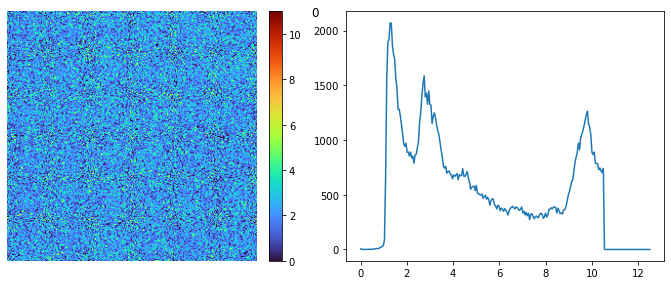

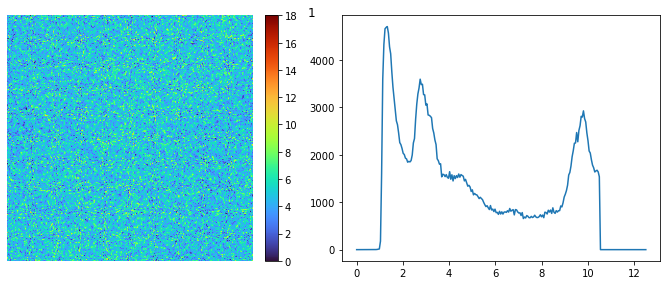

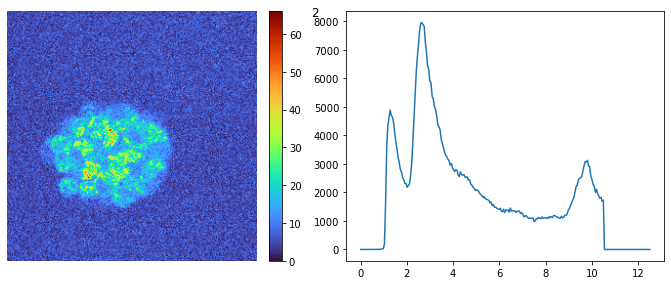

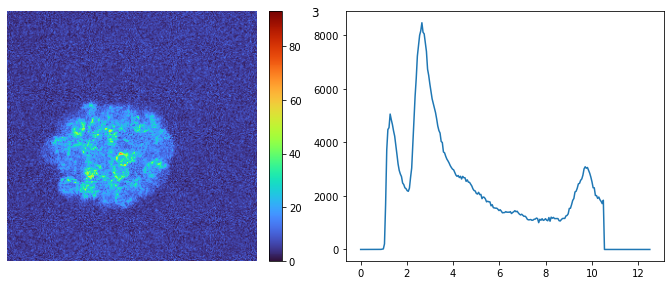

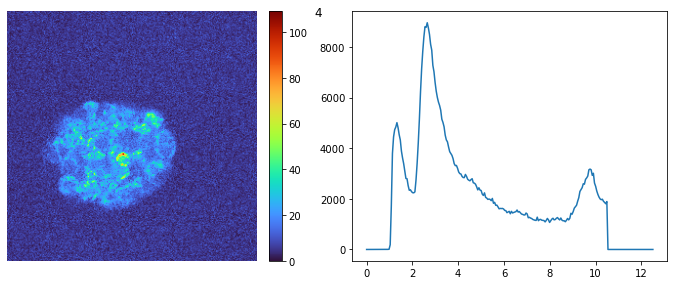

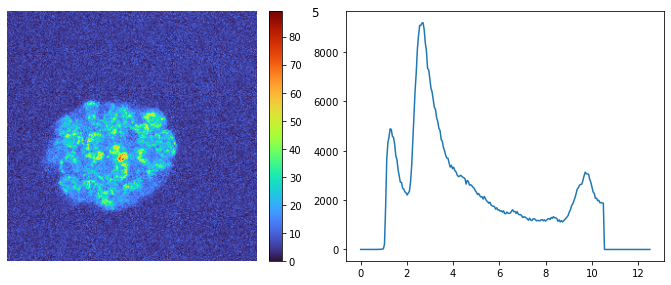

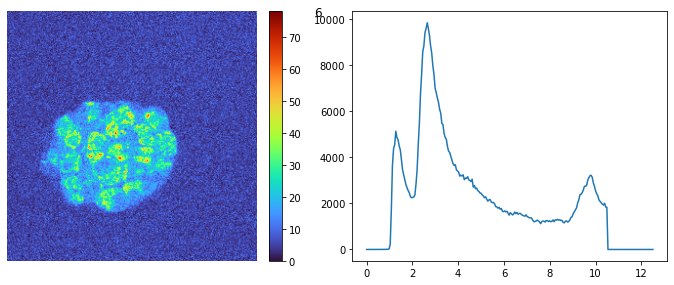

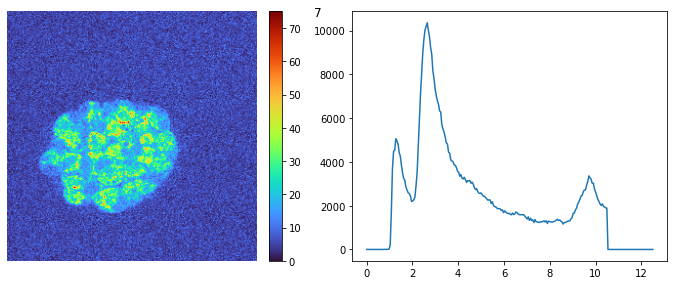

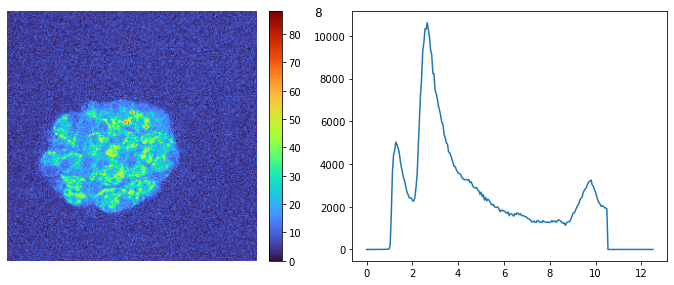

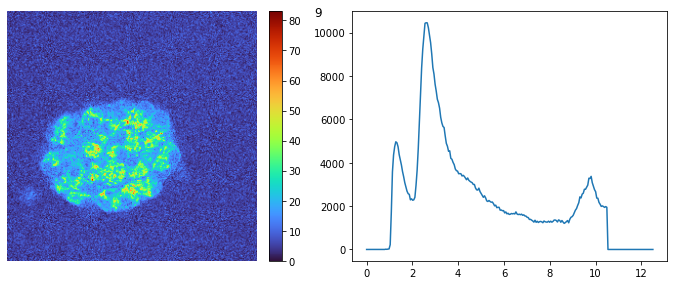

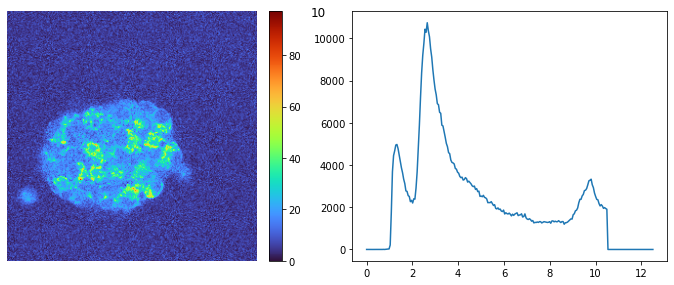

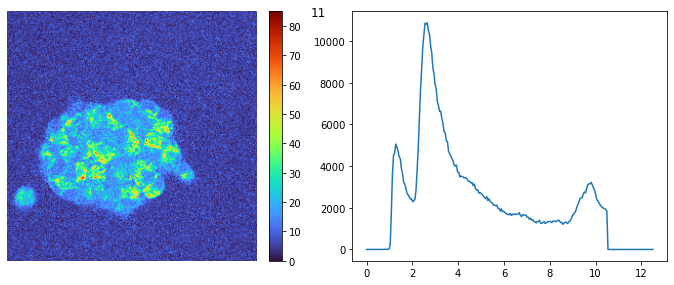

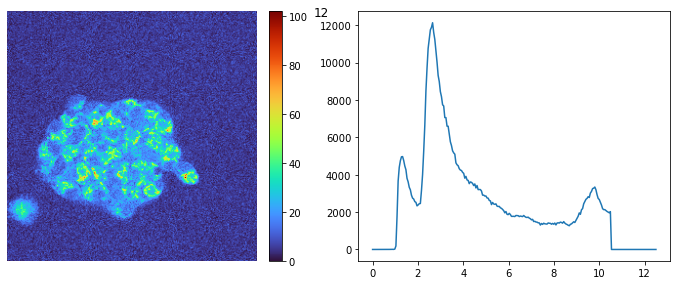

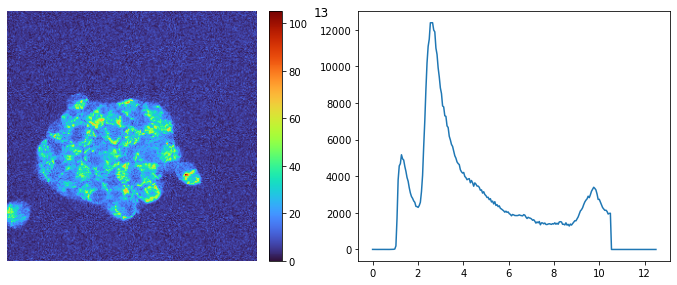

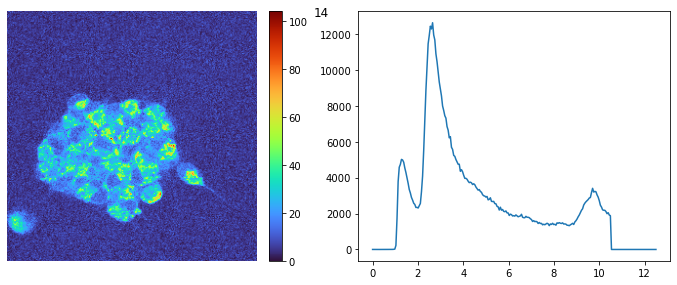

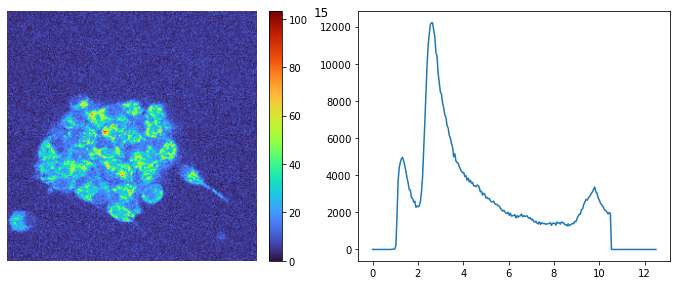

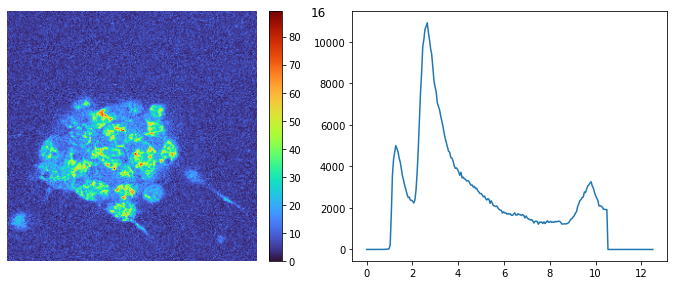

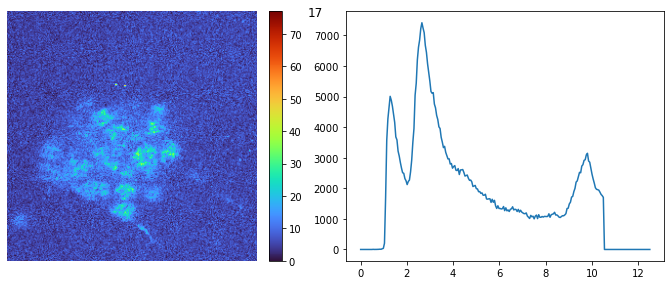

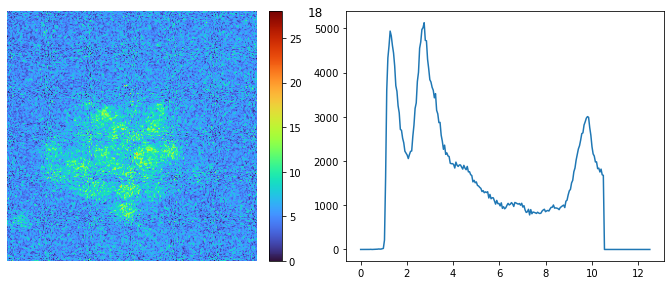

In [20]:
for idx, key in enumerate(f.keys()):
    print(key)
    img_arr = f[key][()]
    img_arr = img_arr.astype(int)
    figure(figsize=[10,4])
    subplot(121)
    imshow(img_arr.sum(2), interpolation='bilinear',cmap='turbo')
    axis('off')
    colorbar(fraction=0.046, pad=0.04)
    subplot(122)
    plot(np.linspace(0,12.5,256),img_arr.sum((0,1)))
    tight_layout()
    suptitle(f'{idx}')
    #break


GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z896_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z898_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z900_G80.spc
GT_A7_flim_Nrascells_D131740_S0_H160_Q113_Z902_G80.spc


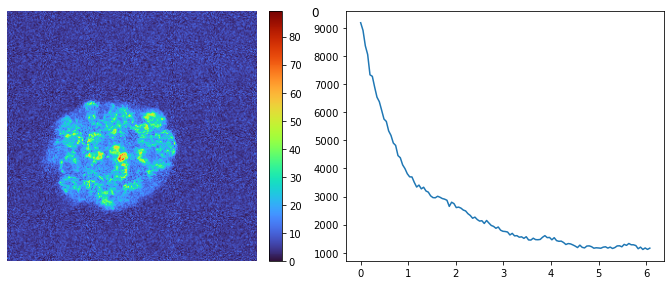

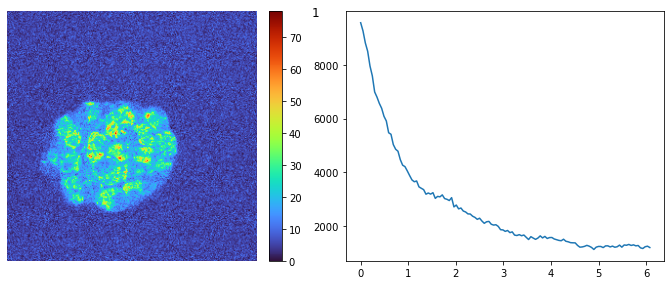

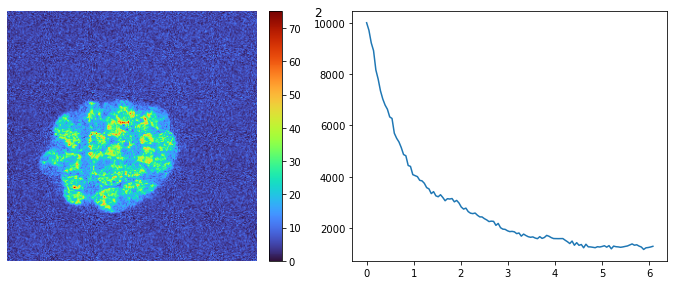

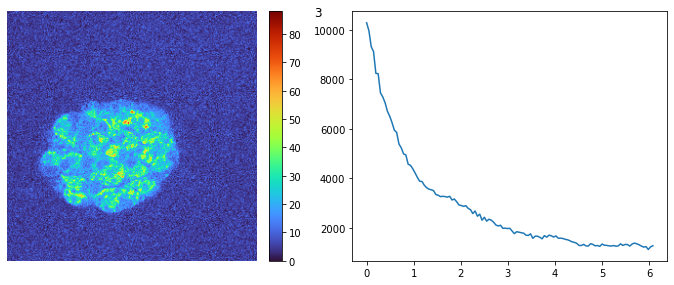

In [36]:
for idx, key in enumerate(list(f.keys())[5:9]):
    print(key)
    img_arr = f[key][()]
    img_arr = img_arr.astype(int)
    figure(figsize=[10,4])
    subplot(121)
    imshow(img_arr.sum(2), interpolation='bilinear',cmap='turbo')
    axis('off')
    colorbar(fraction=0.046, pad=0.04)
    subplot(122)
    tx = img_arr.sum((0,1))[55:180]
    xt = np.linspace(0,12.5,256)[:len(tx)]
    plot(xt,tx)
    
    tight_layout()
    suptitle(f'{idx}')
    

In [54]:
fitstart = 55
fitend   = 180

In [31]:
import flimlib

1.1347514


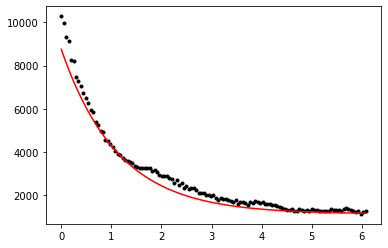

In [46]:
rld_results = flimlib.GCI_triple_integral_fitting_engine(0.04,tx)
print(rld_results.tau)
plot(xt,tx,'.k')
plot(xt,rld_results.A*np.exp(-xt/rld_results.tau)+rld_results.Z,'r')

0.9558021


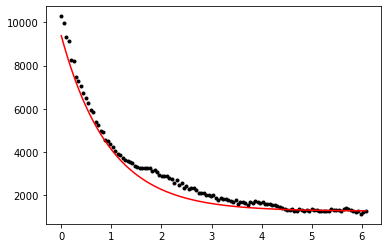

In [47]:
params = [rld_results.Z,rld_results.A,rld_results.tau]
lma_results = flimlib.GCI_marquardt_fitting_engine(0.04,tx,param=params)
lma_Z,lma_A,lma_tau =  lma_results.param
print(lma_tau)
plot(xt,tx,'.k')
plot(xt,lma_A*np.exp(-xt/lma_tau)+lma_Z,'r')

0.30705717 1.3669975


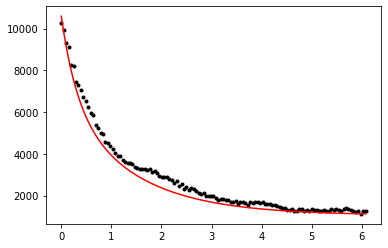

In [49]:
params = [rld_results.Z,rld_results.A,rld_results.tau,rld_results.A,rld_results.tau]
lma_results = flimlib.GCI_marquardt_fitting_engine(0.04,tx,param=params)
lma_Z,lma_A,lma_tau,lma_A2,lma_tau2 =  lma_results.param
print(lma_tau,lma_tau2)
plot(xt,tx,'.k')
plot(xt,lma_A*np.exp(-xt/lma_tau)+lma_A2*np.exp(-xt/lma_tau2)+lma_Z,'r')

0.30751145 1.3673177 1.3694917


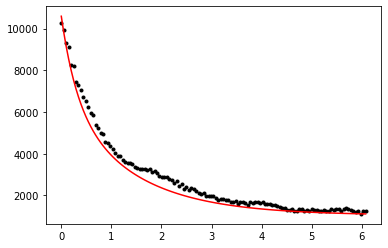

In [52]:
params = [rld_results.Z,rld_results.A,rld_results.tau,rld_results.A,rld_results.tau,rld_results.A,rld_results.tau]
lma_results = flimlib.GCI_marquardt_fitting_engine(0.04,tx,param=params)
lma_Z,lma_A,lma_tau,lma_A2,lma_tau2,lma_A3,lma_tau3 =  lma_results.param
print(lma_tau,lma_tau2,lma_tau3)
plot(xt,tx,'.k')
plot(xt,lma_A*np.exp(-xt/lma_tau)+lma_A2*np.exp(-xt/lma_tau2)+lma_A3*np.exp(-xt/lma_tau3)+lma_Z,'r')

In [82]:
import cv2 as cv
def bin_2D (arr,binsize=3):
    kernel = np.ones((binsize,binsize),np.float32)
    arr_mod = cv.filter2D(arr,-1,kernel)
    return(arr_mod)

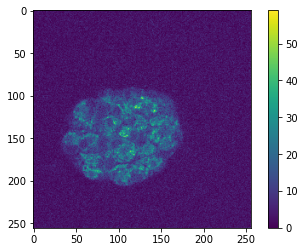

In [92]:
tarr = img_arr[:,:,fitstart:fitend]
imshow(tarr.sum(2))
colorbar()

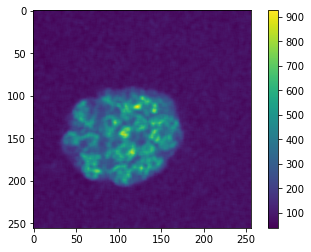

In [95]:
tarr = bin_2D(img_arr.astype(np.float32),5)[:,:,fitstart:fitend]
imshow(tarr.sum(2))
colorbar()

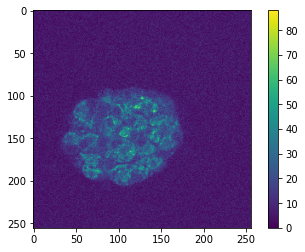

In [101]:
imshow(img_arr.sum(2))
colorbar()

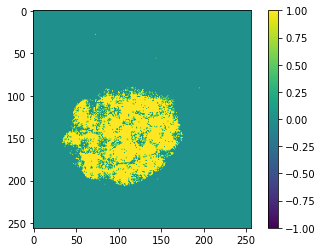

In [119]:
m = img_arr.sum(2)> img_arr.sum(2).mean()*1.8
imshow(m,vmin=-1,vmax=1)
colorbar()

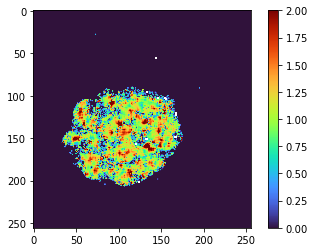

In [122]:
rld_results = flimlib.GCI_triple_integral_fitting_engine(0.04,tarr,fit_mask =m )
imshow(rld_results.tau,vmax=2,vmin=0,cmap='turbo')
colorbar()

In [123]:
tarr.shape

(256, 256, 125)

In [124]:
params = np.transpose(np.array([rld_results.Z,rld_results.A,rld_results.tau,rld_results.A,rld_results.tau]),[2,1,0])
lma_results = flimlib.GCI_marquardt_fitting_engine(0.04,photon_count=tarr,param=params)
lma_Z,lma_A,lma_tau,lma_A2,lma_tau2 =  np.transpose(lma_results.param,[2,1,0])

In [125]:
lma_results.param.shape

(256, 256, 5)

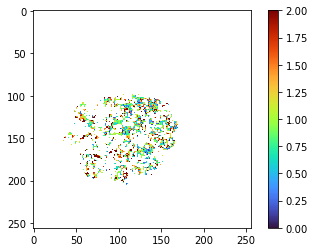

In [127]:
imshow(lma_tau,vmax=2,vmin=0,cmap='turbo')
colorbar()

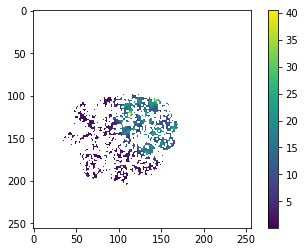

In [126]:
imshow(lma_A+lma_A2)
colorbar()